# Visualize Weather

These are visualization of the weather data I gathered from the NOAA site, located in New York's Central Park. They show weather conditions across about just over 4 years, 1599 weeks, or 11193 days.


Sampling is important because we have too much data to work with effectively. So for weather data 1599 samples is a good number. While I could drill down to weather per day, it's almost too much to work with.

The 311 call information represents 20 million calls, and over 11 gigs of data. So I stripped out the columns that I though would be most useful, and from those I'll sample down to 20,000 rows.

After visualizing, especially the weather histograms, you can get a better idea of how to label the weather events. So I did that and then oneshot encoded them for further analysis later on.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,16)


In [77]:
df_daily = pd.read_csv("~/Projects/CourseraCapstone/daily_weather_nyc.csv", index_col=0)

In [3]:
df_daily.head()

,DATE,DailyAverageDryBulbTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,Sunrise,Sunset
24,2015-01-01 23:59:00,33,31.0,0.00,0.0,0.0,720.0,1639.0
49,2015-01-02 23:59:00,39,25.0,0.00,0.0,0.0,720.0,1640.0
109,2015-01-03 23:59:00,38,18.0,0.71,0.0,0.0,720.0,1641.0
161,2015-01-04 23:59:00,49,46.0,0.30,0.0,0.0,720.0,1642.0
186,2015-01-05 23:59:00,35,38.0,0.00,0.0,0.0,720.0,1643.0


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,16)


In [5]:
df_daily.shape

(1599, 8)

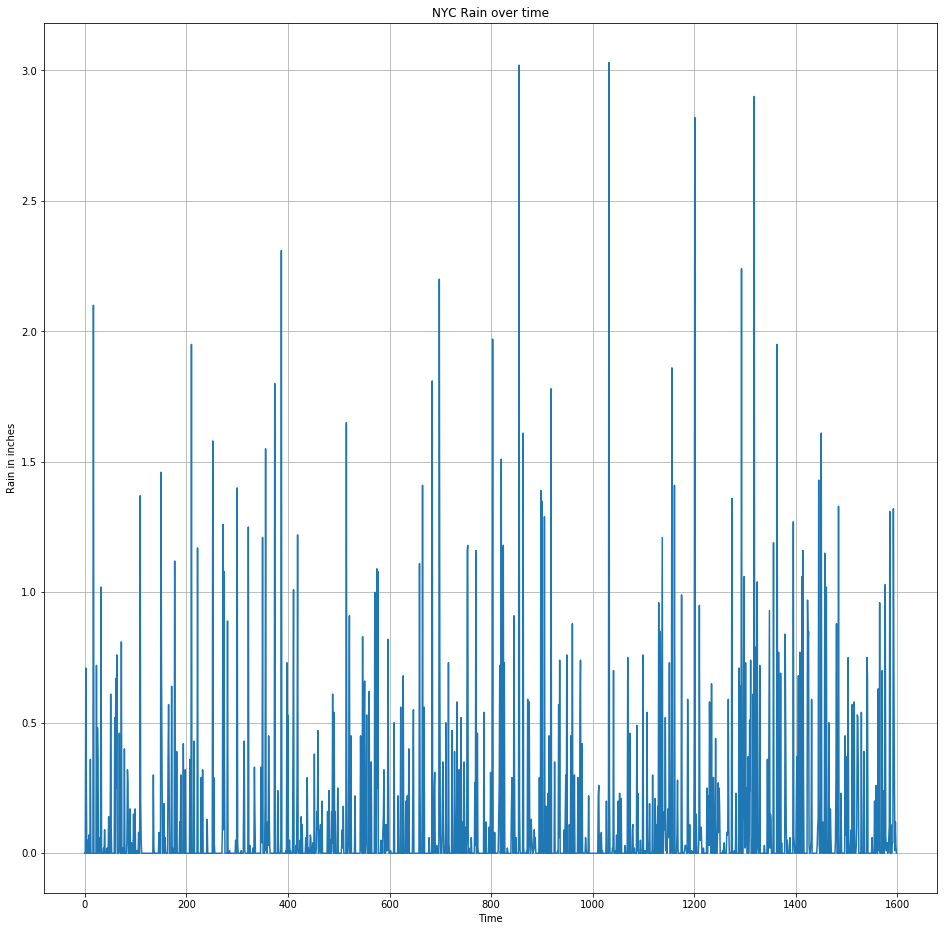

In [6]:
# Data for plotting
s = df_daily.DailyPrecipitation[:1599]


t = np.arange(0, 1599, 1)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Time', ylabel='Rain in inches',
       title='NYC Rain over time')
ax.grid()

fig.savefig("rain.png")
plt.show()

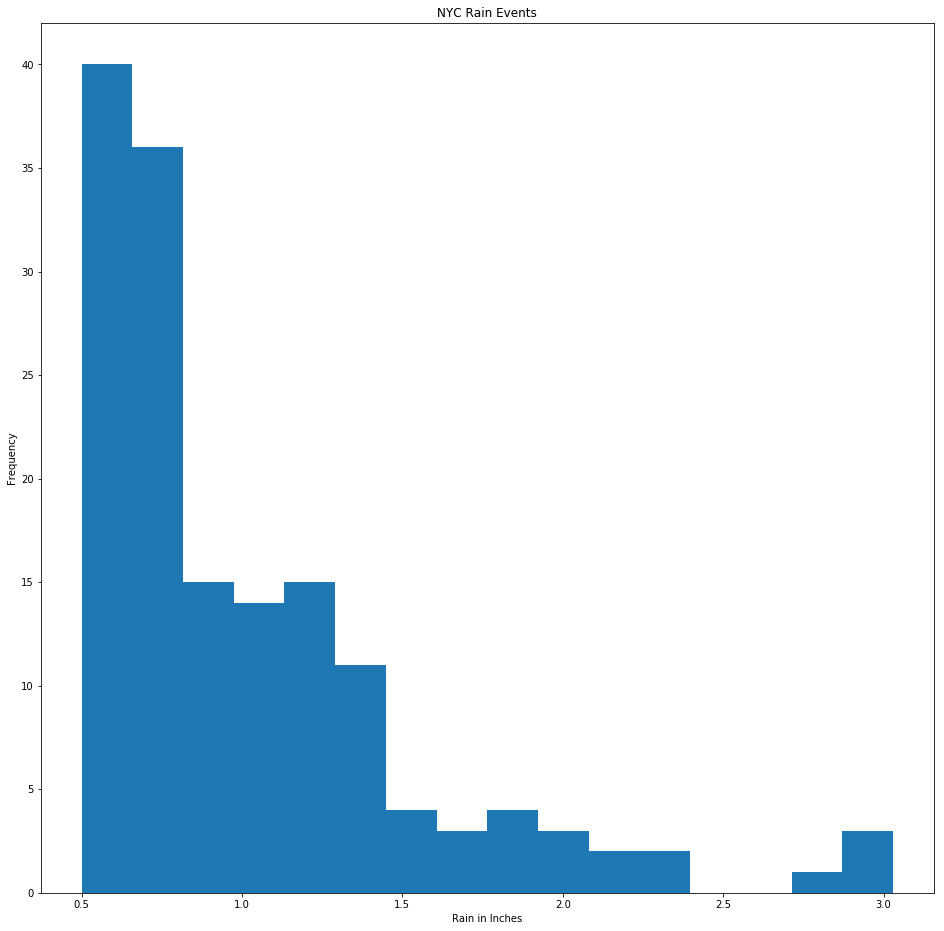

In [7]:
fig, ax = plt.subplots()
s = df_daily.DailyPrecipitation[:1599]
s = df_daily.DailyPrecipitation[(df_daily.DailyPrecipitation >= 0.5)]
ax.set(xlabel='Rain in Inches', 
       title='NYC Rain Events')
ax = s.plot.hist(bins=16)
fig.savefig("rain-hist.png")


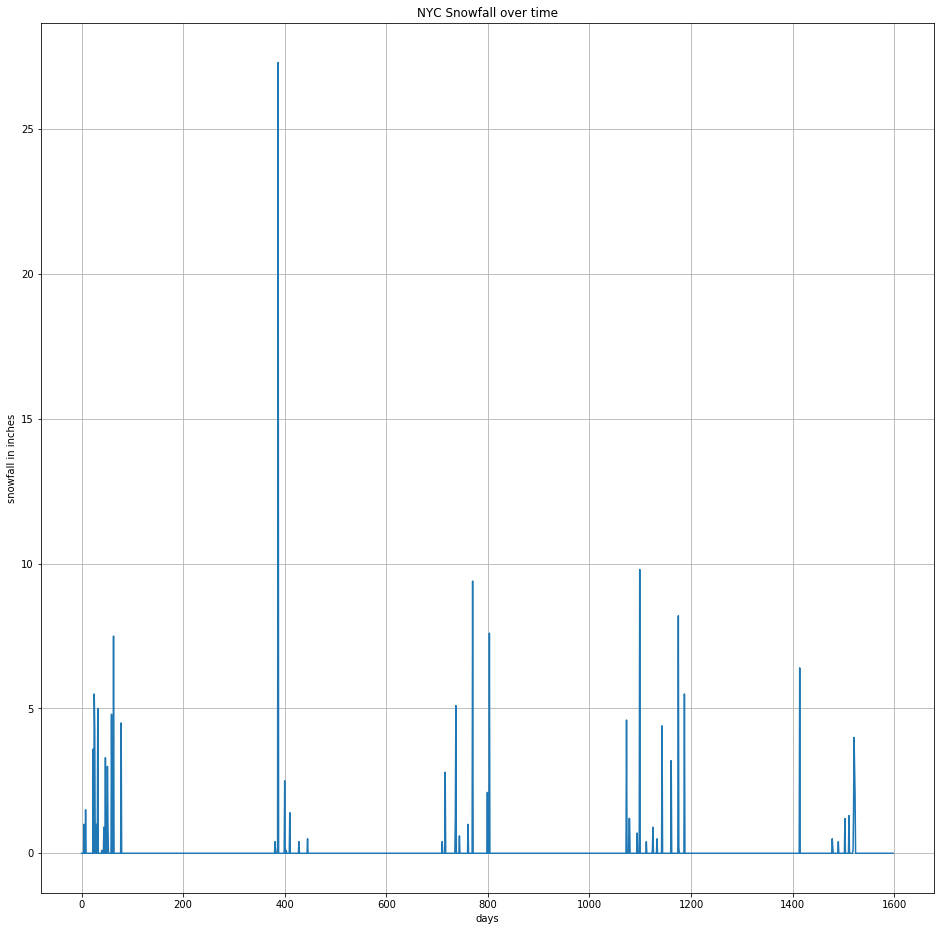

In [8]:
# Data for plotting
s = df_daily.DailySnowfall[:1599]


t = np.arange(0, 1599, 1)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='days', ylabel='snowfall in inches',
       title='NYC Snowfall over time')
ax.grid()

fig.savefig("snow.png")
plt.show()

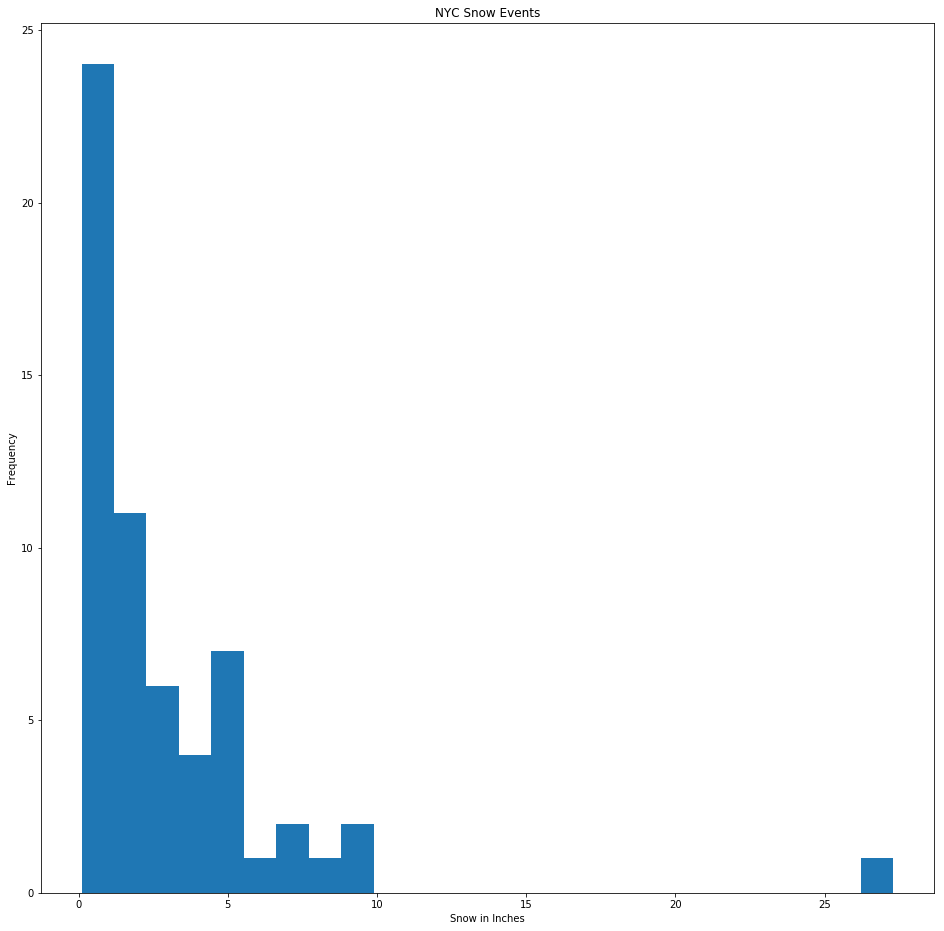

In [9]:
fig, ax = plt.subplots()
s = df_daily.DailySnowfall[(df_daily.DailySnowfall > 0)]
ax.set(xlabel='Snow in Inches', 
       title='NYC Snow Events')
ax = s.plot.hist(bins=25)
fig.savefig("snow-hist.png")

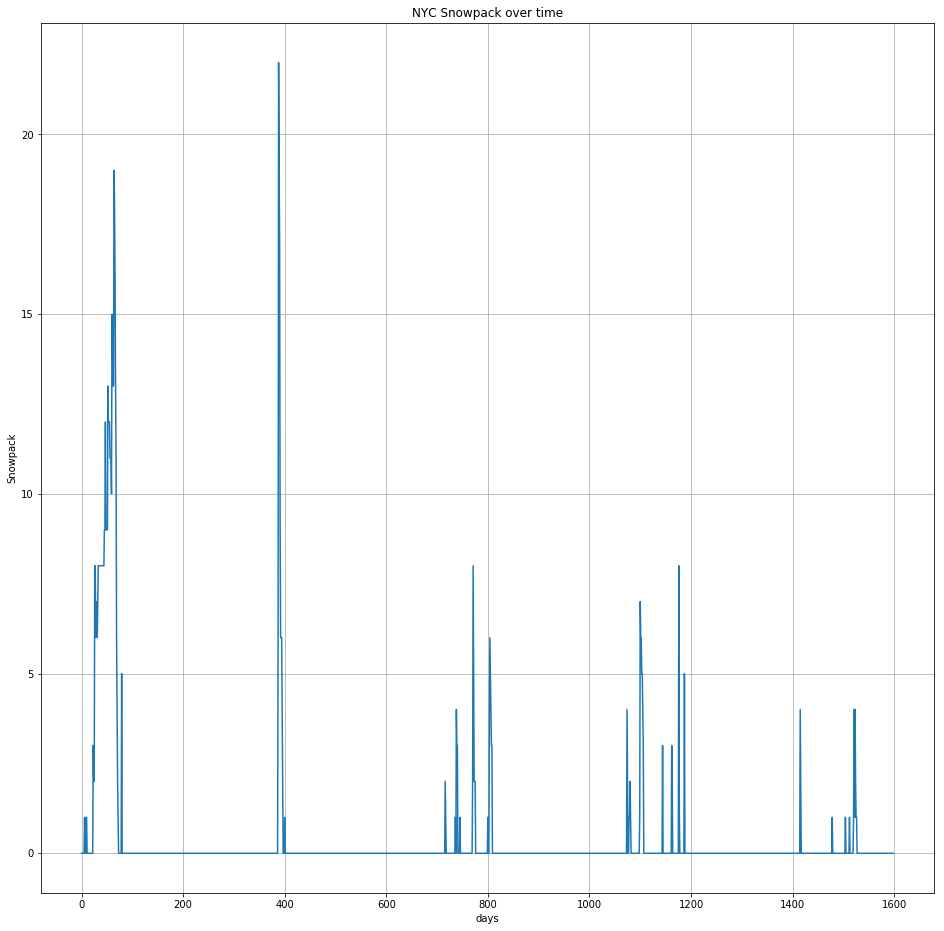

In [62]:
# Data for plotting
s = df_daily.DailySnowDepth[:1599]
t = np.arange(0, 1599, 1)


fig, ax = plt.subplots()
ax.plot(t, s)


ax.set(xlabel='days', ylabel='Snowpack',
       title='NYC Snowpack over time')
ax.grid()

fig.savefig("snowpack.png")
plt.show()

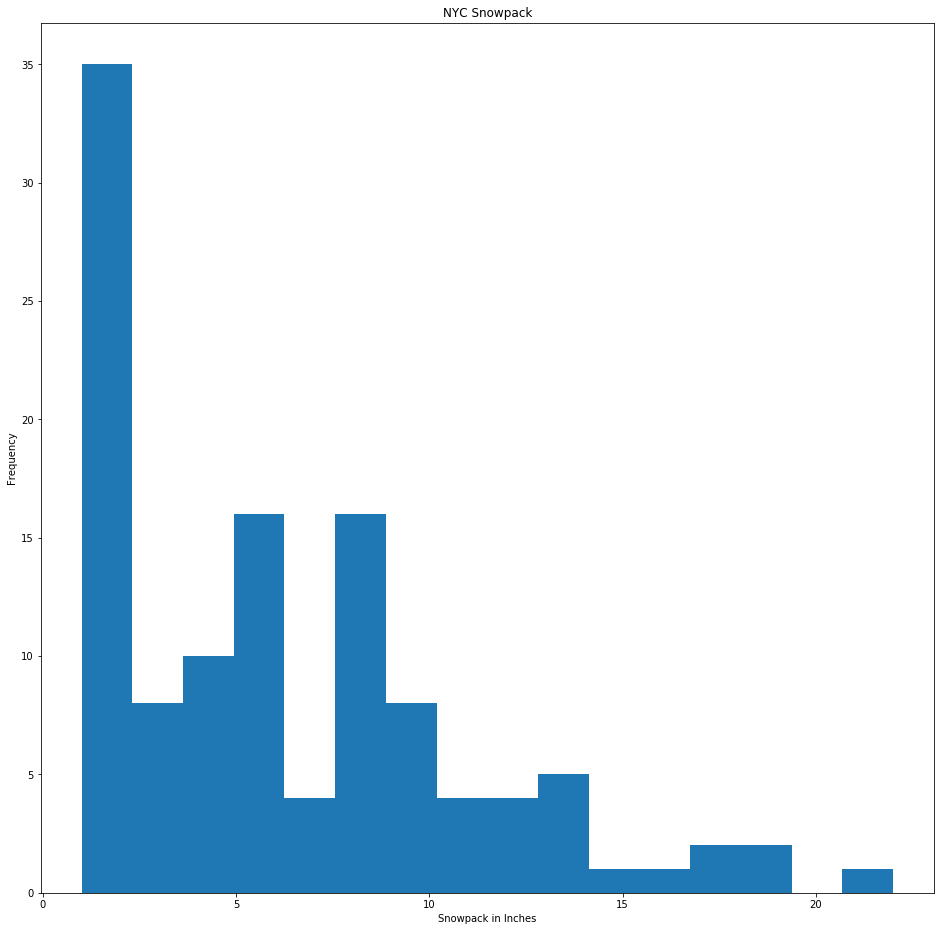

In [11]:
fig, ax = plt.subplots()
s = df_daily.DailySnowDepth[(df_daily.DailySnowDepth > 0)]
#s = df_daily.DailyPeakWindSpeed[(df_daily.DailyPeakWindSpeed < 120)])

ax.set(xlabel='Snowpack in Inches', 
       title='NYC Snowpack')

ax = s.plot.hist(bins=16)
fig.savefig("snowpack-hist.png")


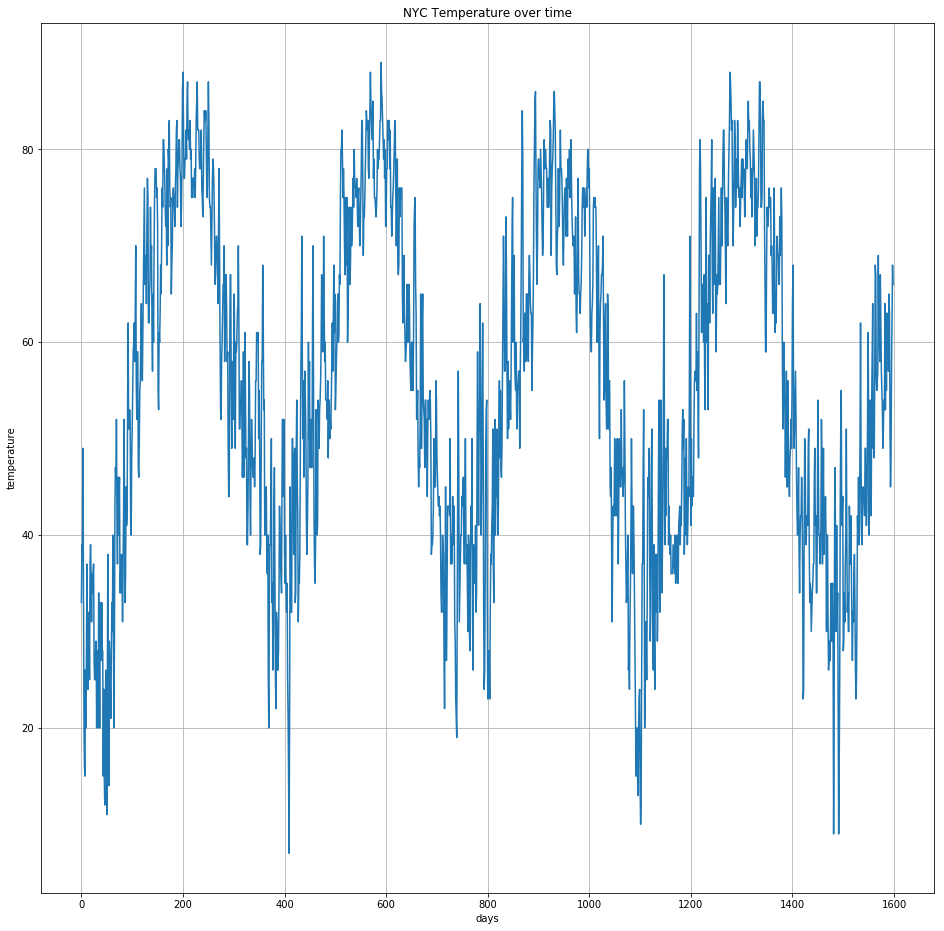

In [12]:
# Data for plotting
s = df_daily.DailyAverageDryBulbTemperature[:1599]

t = np.arange(0, 1599, 1)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='days', ylabel='temperature',
       title='NYC Temperature over time')
ax.grid()

fig.savefig("temperature.png")
plt.show()

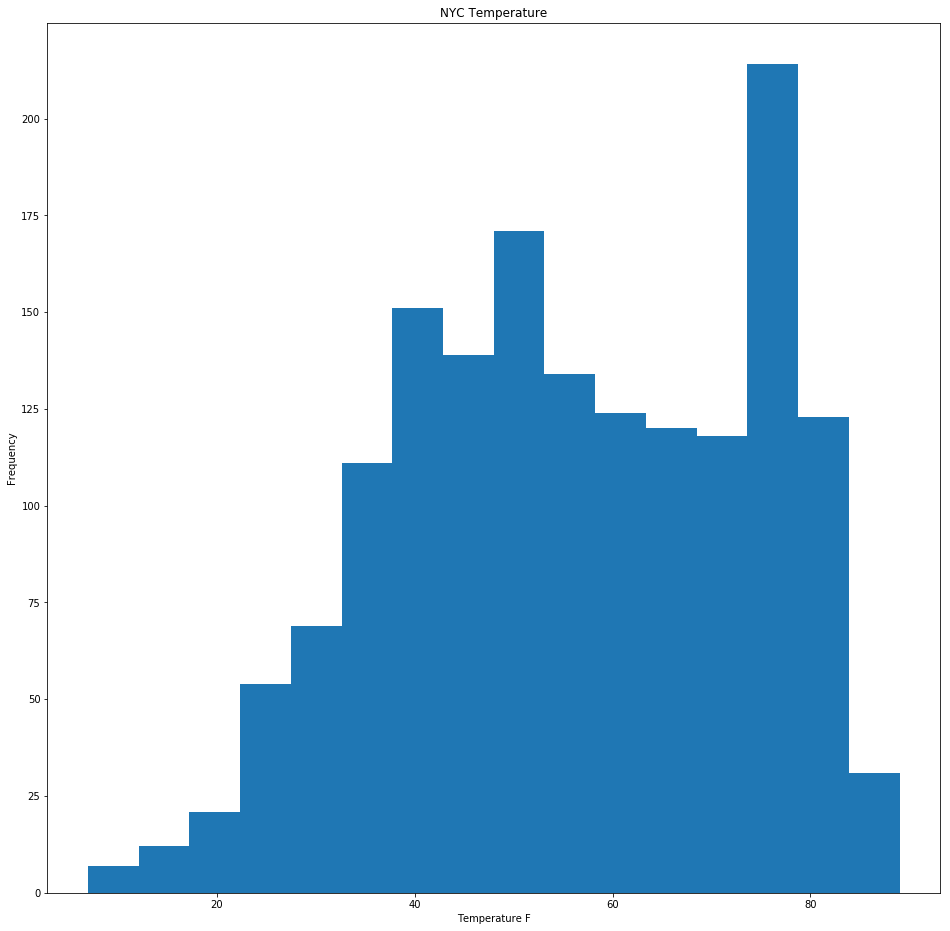

In [13]:
fig, ax = plt.subplots()
s = df_daily.DailyAverageDryBulbTemperature[:1599]
ax = s.plot.hist(bins=16)
ax.set(xlabel='Temperature F', 
       title='NYC Temperature')
fig.savefig("temp-hist.png")

In [14]:
df_daily['wind2'] = df_daily.DailyPeakWindSpeed.apply(lambda x: x if (x<100 and x > 1) else 0)
s = pd.DataFrame(df_daily.DailyPeakWindSpeed[(df_daily.DailyPeakWindSpeed < 120)])

#and (df_daily.DailyPeakWindSpeed > 1)]
s.shape

(1446, 1)

(1427,)


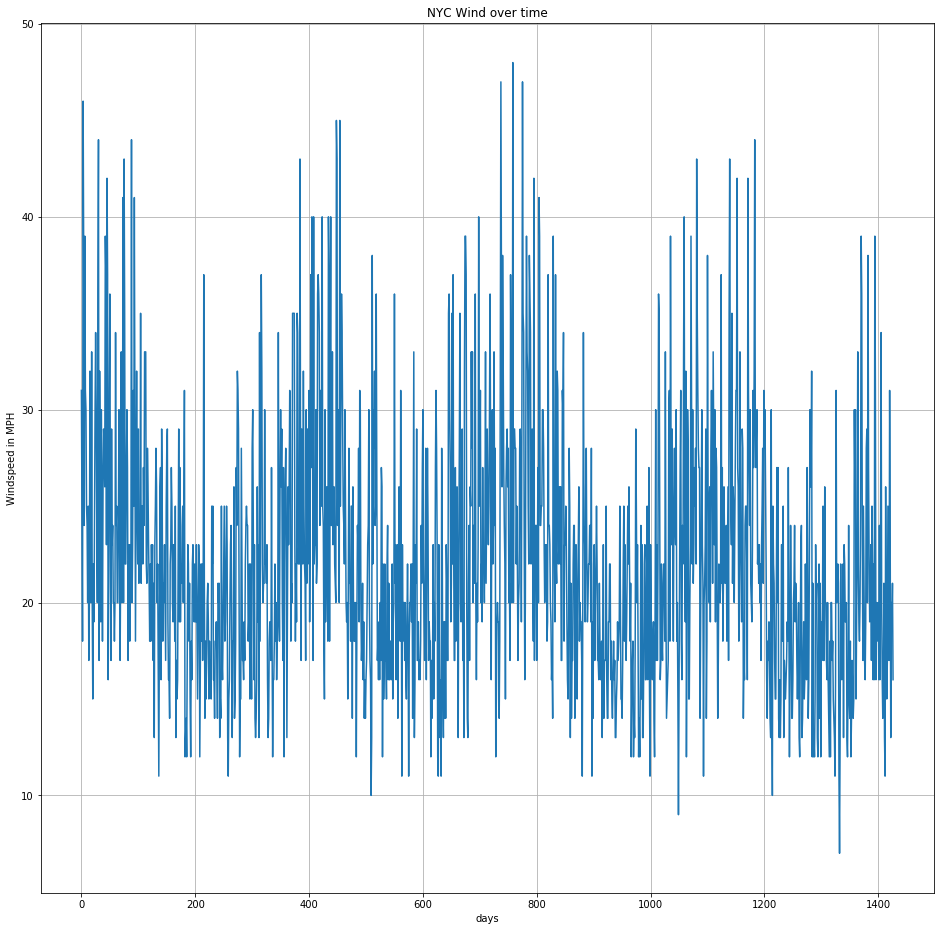

In [15]:
# Data for plotting
s = pd.DataFrame(df_daily.DailyPeakWindSpeed[df_daily.DailyPeakWindSpeed < 120 ])
s = s.DailyPeakWindSpeed[df_daily.DailyPeakWindSpeed > 1 ]

print(s.shape)
t = np.arange(0, 1427, 1)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='days', ylabel='Windspeed in MPH',
       title='NYC Wind over time')
ax.grid()

fig.savefig("wind_broken.png")
plt.show()

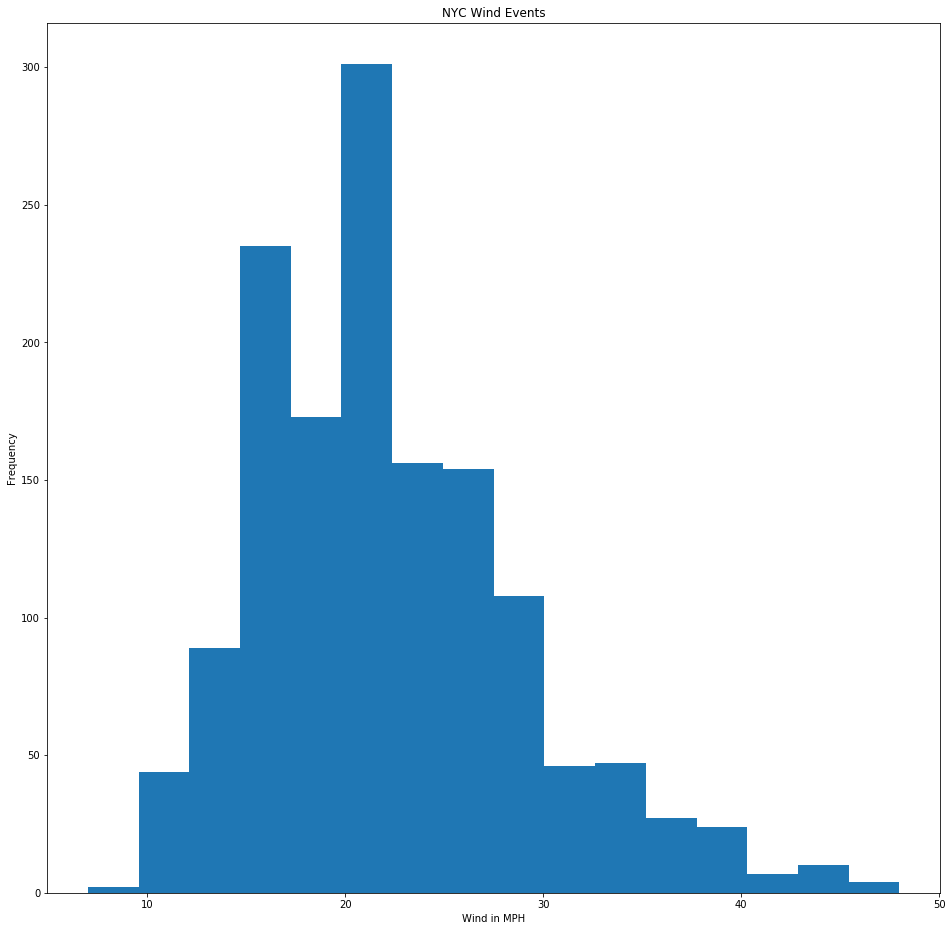

In [16]:
#s = df_daily.DailyPeakWindSpeed[:1599]
fig, ax = plt.subplots()
ax = s.plot.hist(bins=16)
ax.set(xlabel='Wind in MPH', 
       title='NYC Wind Events')
fig.savefig("wind-hist.png")


(1427,)
(1427,)


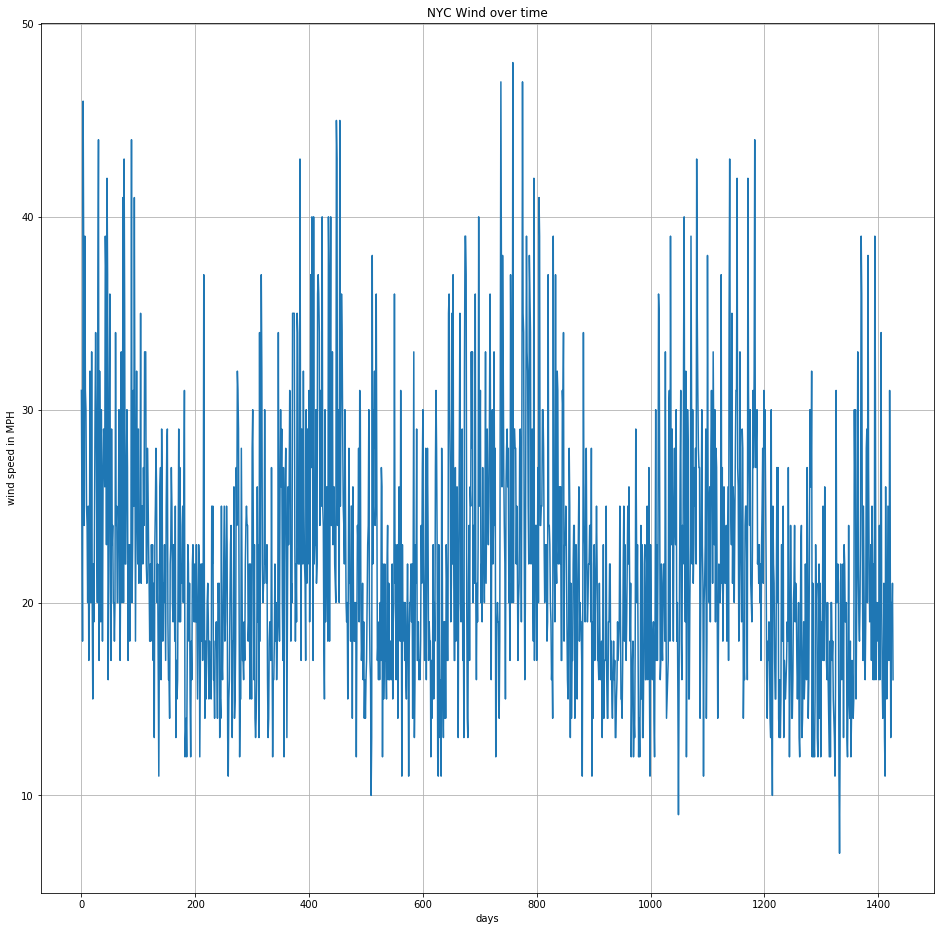

In [17]:
# Data for plotting
print(s.shape) 
s = df_daily.wind2[(df_daily.wind2 > 1)]
#s = df_daily.wind2[:1599]

print(s.shape)
t = np.arange(0, 1427, 1)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='days', ylabel='wind speed in MPH',
       title='NYC Wind over time')
ax.grid()

fig.savefig("wind_fixed.png")
plt.show()

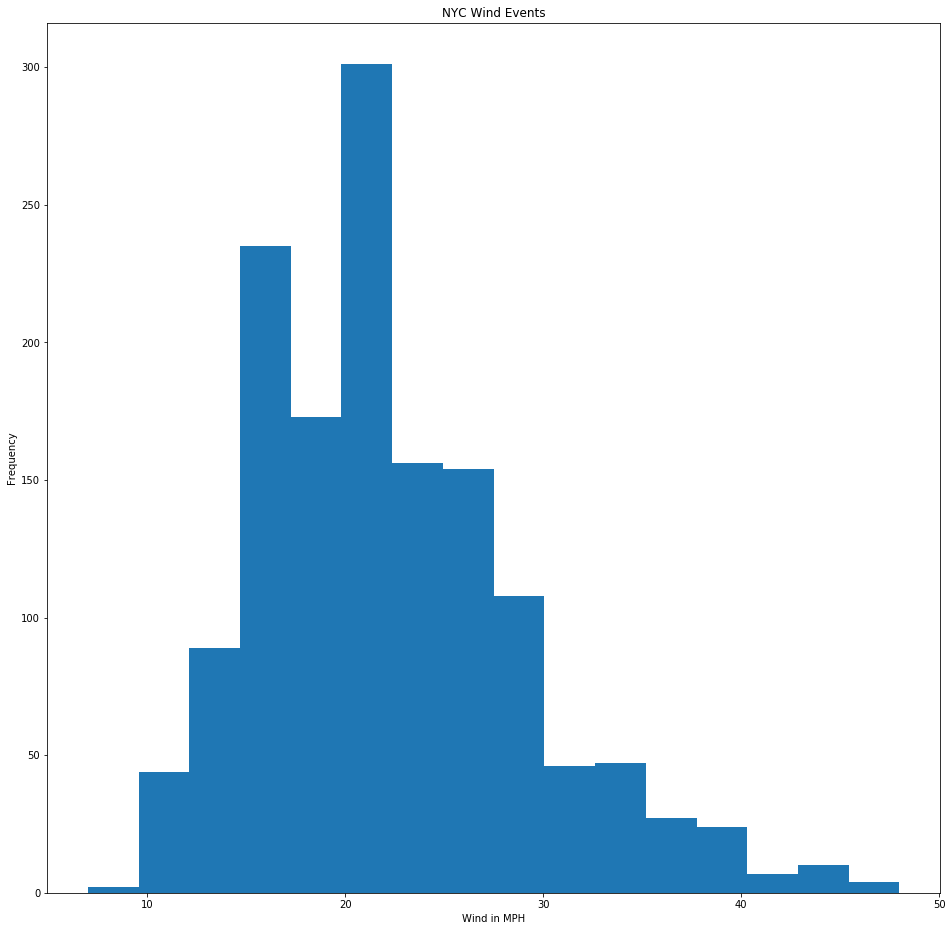

In [18]:
#s = df_daily.wind2[:1599]
fig, ax = plt.subplots()
ax = s.plot.hist(bins=16)
ax.set(xlabel='Wind in MPH', 
       title='NYC Wind Events')
fig.savefig("wind-fixed-hist.png")


# Let's add features

The key thing is to add one or more features that identifies the weather condition in a way that we can use it in a classier. 



In [66]:
df_daily['Condition']   = "Normal"
df_daily['Temperature'] = "Mild"

def transform_row(r):
    if (r.DailySnowDepth > 4): 
        r.Condition = "Snowpack"
    if ((r.DailyPeakWindSpeed > 35) & (r.DailyPeakWindSpeed < 200)):
        r.Condition = "Wind"
    if (r.DailySnowfall > 1.0) :
        r.Condition = "Snow"
    if (r.DailyPrecipitation > 0.5):
        r.Condition = "Rain"
    if (r.DailyPrecipitation > 1.75):
        r.Condition = "Rainstorm"
    if (r.DailyPrecipitation > 2.5):
        r.Condition = "TStorm"
    if (r.DailySnowfall > 4.0) :
        r.Condition = "Snowstorm"
    if (r.DailySnowfall > 9.0 ):
        r.Condition = "Blizzard"
    if ((r.DailyPrecipitation > 3.5) & (r.DailyPeakWindSpeed > 35) & (r.DailyPeakWindSpeed < 200)):
        r.Condition = "Hurricane"
    if (r.DailyAverageDryBulbTemperature > -100):
        r.Temperature = "VCold"
    if (r.DailyAverageDryBulbTemperature > 30):
        r.Temperature = "Cold"
    if (r.DailyAverageDryBulbTemperature > 50):
        r.Temperature = "Chilly"
    if (r.DailyAverageDryBulbTemperature > 70):
        r.Temperature = "Warm"
    if (r.DailyAverageDryBulbTemperature > 80):
        r.Temperature = "Hot"
    if (r.DailyAverageDryBulbTemperature > 85):
        r.Temperature = "VHot"
    return r

df_daily = df_daily.apply(transform_row, axis=1)


In [74]:
df_daily[df_daily['Condition'] == 'Normal'].count()
#df_daily[df_daily['DailySnowfall'] > 10]

DATE                              1333
DailyAverageDryBulbTemperature    1333
DailyPeakWindSpeed                1333
DailyPrecipitation                1333
DailySnowDepth                    1333
DailySnowfall                     1333
Sunrise                           1333
Sunset                            1333
wind2                             1333
Condition                         1333
Temperature                       1333
dtype: int64

In [72]:
pd.get_dummies(df_daily, columns=["Condition", "Temperature"]).to_csv("Weather_One_Shot.csv")

In [73]:
df_daily

,DATE,DailyAverageDryBulbTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,Sunrise,Sunset,wind2,Condition,Temperature
24,2015-01-01 23:59:00,33,31.0,0.00,0.0,0.0,720.0,1639.0,31.0,Normal,Cold
49,2015-01-02 23:59:00,39,25.0,0.00,0.0,0.0,720.0,1640.0,25.0,Normal,Cold
109,2015-01-03 23:59:00,38,18.0,0.71,0.0,0.0,720.0,1641.0,18.0,Rain,Cold
161,2015-01-04 23:59:00,49,46.0,0.30,0.0,0.0,720.0,1642.0,46.0,Wind,Cold
186,2015-01-05 23:59:00,35,38.0,0.00,0.0,0.0,720.0,1643.0,38.0,Wind,Cold
228,2015-01-06 23:59:00,21,24.0,0.05,0.0,1.0,720.0,1644.0,24.0,Normal,VCold
253,2015-01-07 23:59:00,16,39.0,0.00,1.0,0.0,720.0,1644.0,39.0,Wind,VCold
278,2015-01-08 23:59:00,15,31.0,0.00,0.0,0.0,720.0,1645.0,31.0,Normal,VCold
314,2015-01-09 23:59:00,26,30.0,0.07,0.0,1.5,720.0,1646.0,30.0,Snow,VCold
339,2015-01-10 23:59:00,20,25.0,0.00,1.0,0.0,720.0,1647.0,25.0,Normal,VCold
